# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Plotting-likelihood-function-for-our-failure-rate,-p" data-toc-modified-id="Plotting-likelihood-function-for-our-failure-rate,-p-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting likelihood function for our failure rate, p</a></div><div class="lev1 toc-item"><a href="#Hacking-confidence-intervals" data-toc-modified-id="Hacking-confidence-intervals-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hacking confidence intervals</a></div><div class="lev1 toc-item"><a href="#Beta-prior" data-toc-modified-id="Beta-prior-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Beta prior</a></div>

With a maximum likelihood problem, we want to estimate a parameter of a distribution.
For the quality control example, we want to estimate the failure probability given the data we were given.
Data provided: f Failures out of N samples

For the quality control example, a binomial distribution seems reasonable. It assumes that the failure rate is constant and that the failures are independent of one another. Later, perhaps we will play with these assumptions

In [165]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from scipy import stats

In [2]:
failure_n = 0
sample_n = 30

# Plotting likelihood function for our failure rate, p

In [161]:
#binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
def get_binomial_likelihood(sample_n,fail_n,res=100):
    #assert type(sample_n) is int, "sample_n is not an integer: %r" % id
    if type(sample_n) != int: raise TypeError('sample_n is not an int')
    if type(fail_n) != int: raise TypeError('fail_n is not an int')
    p_guesses = np.linspace(0,1,res)
    likelihood = []
    for p in p_guesses:
        likelihood.append(stats.binom(sample_n,p).pmf(fail_n))
    return likelihood,p_guesses

<IPython.core.display.Javascript object>


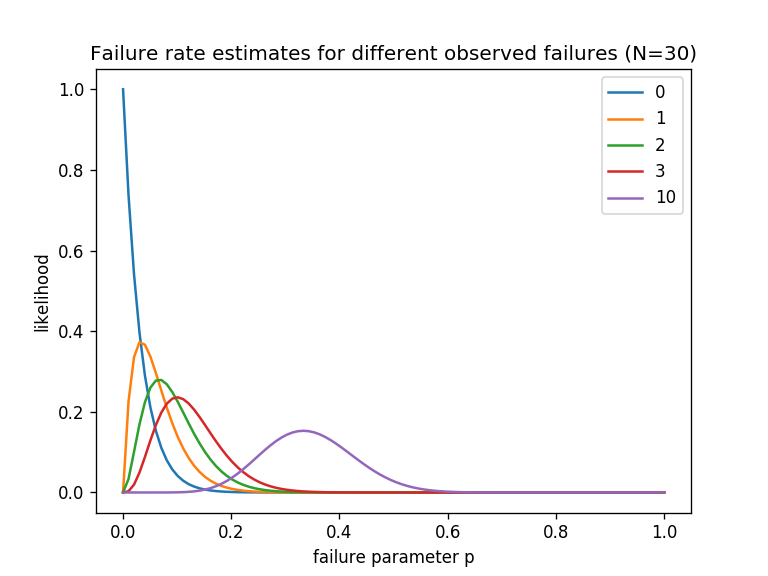

In [124]:
fig,ax = plt.subplots()
fail_rates = [0,1,2,3,10]
for fail_n in fail_rates:
    likelihood,p_guesses = get_binomial_likelihood(sample_n,fail_n)
    plt.plot(p_guesses,likelihood,label=str(fail_n))

plt.xlabel('failure parameter p')
plt.ylabel('likelihood')
plt.title('Failure rate estimates for different observed failures (N=30)')
plt.legend(loc='best')


<IPython.core.display.Javascript object>


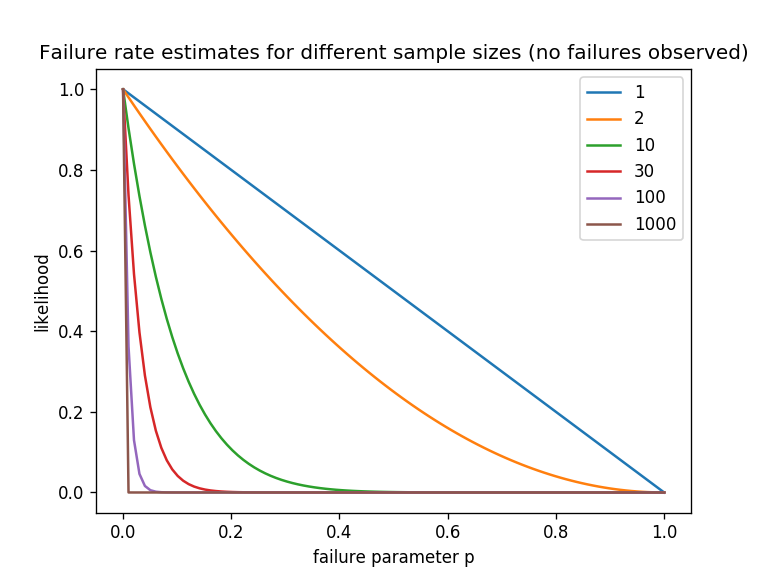

In [144]:
fig,ax = plt.subplots()
sample_sizes = [1,2,10,30,100,1000]
for size in sample_sizes:
    likelihood,p_guesses = get_binomial_likelihood(size,failure_n)
    plt.plot(p_guesses,likelihood,label=str(size))

plt.xlabel('failure parameter p')
plt.ylabel('likelihood')
plt.title('Failure rate estimates for different sample sizes (no failures observed)')
#plt.xscale('log')
plt.legend(loc='best')

# Hacking confidence intervals

I'm not entirely certain about this part. I think that Bayesian confidence intervals are simply the a continuous interval where the posterior probability mass contained in that interval is 1 − α.
However, is it true that we can simply take the normalized likelihood function, if we assume a non-informative prior? That is what I am doing below.

In [71]:
from scipy import integrate

In [73]:
print integrate.trapz(likelihood), sum(likelihood)

3.1935483871 3.1935483871


This is okay! Unlike probabilities, likelihoods don't need to sum to one!

This is a hack, but let's find the range that sums up to (1-alpha)% of the integral of the likelihood

<IPython.core.display.Javascript object>


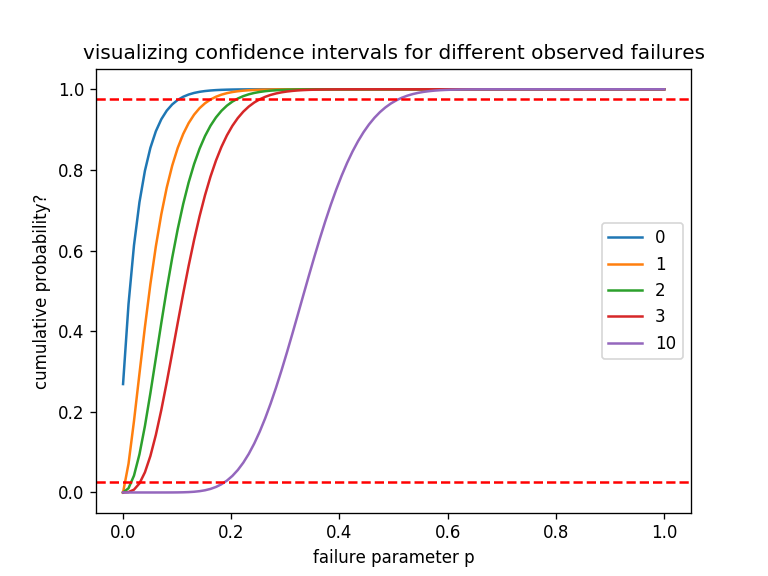

In [142]:
fig,ax = plt.subplots()

for fail_n in fail_rates:
    likelihood,p_guesses = get_binomial_likelihood(sample_n,fail_n)
    plt.plot(p_guesses,np.cumsum(likelihood)/sum(likelihood),label=str(fail_n))

    plt.xlabel('failure parameter p')
    plt.ylabel('cumulative probability?')
    plt.legend(loc='best')
    plt.title('visualizing confidence intervals for different observed failures')
ax.axhline(y=(alpha/2),color='r',ls='dashed')
ax.axhline(y=(1-alpha/2),color='r',ls='dashed')


Note that the two-tailed confidence dashed red lines may not be appropriate for the 0 case, but at worst it is more conservative

In [109]:
likelihood,p_guesses = get_binomial_likelihood(sample_n,failure_n,res=100)
print str((sum(likelihood[0:9])/sum(likelihood))*100)+ '% confidence interval:'
print p_guesses[0],p_guesses[9]

94.7126764065% confidence interval:
0.0 0.0909090909091


Not sure about this difference:

In [116]:
print integrate.trapz(likelihood[0:10])/integrate.trapz(likelihood)
print p_guesses[10]


0.947815741957
0.10101010101


# Beta prior

Update: the Jeffery's prior for a binomial distribution is a beta distribution, perhaps with the parameters 0.5,0.5.


<IPython.core.display.Javascript object>


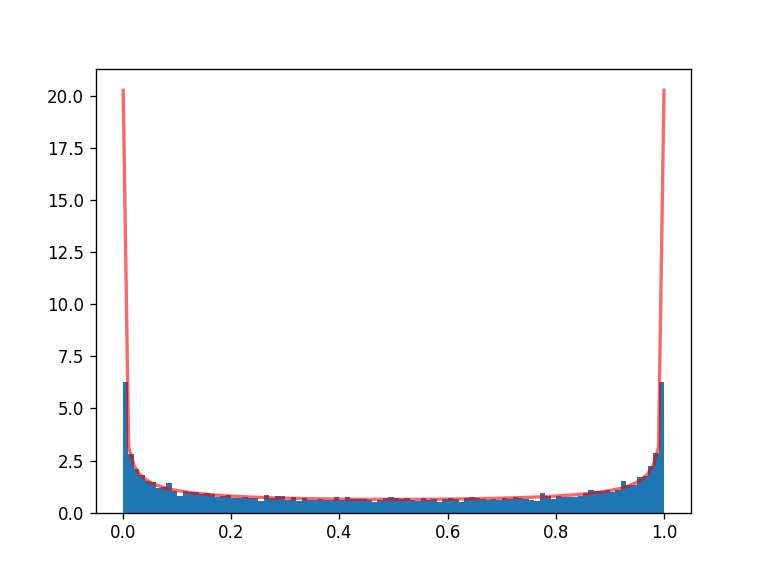

In [184]:
a = 0.5
b= 0.5
fig,ax = plt.subplots()
plt.hist(stats.beta(a,b).rvs(10000),100,normed=True)
x = np.linspace(stats.beta.ppf(0.01, a, b),
                stats.beta.ppf(0.99, a, b), 100)
ax.plot(x, stats.beta.pdf(x, a, b),
        'r-', lw=2, alpha=0.6, label='beta pdf')

In [216]:
print [i for i,l in enumerate(likelihood) if l == 0]
print [i for i,p in enumerate(prior) if p == np.inf]

[]
[0]


<IPython.core.display.Javascript object>


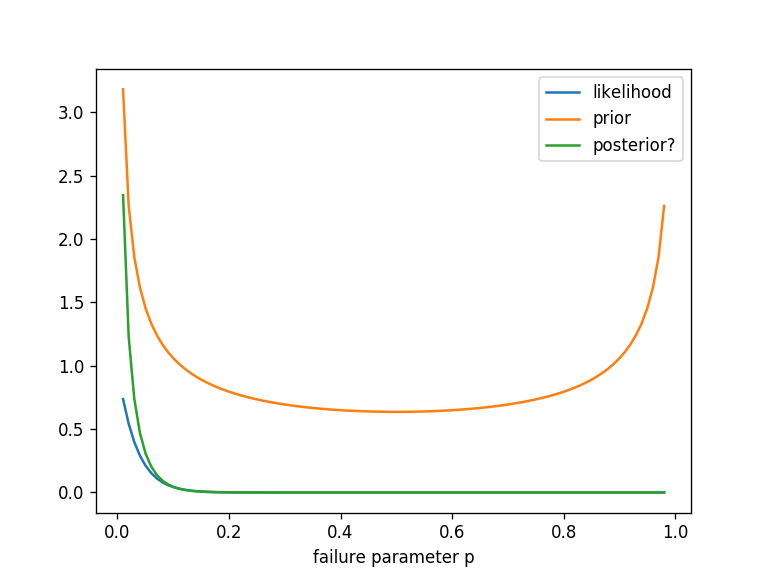

In [220]:
likelihood,p_guesses = get_binomial_likelihood(sample_n,failure_n,res=100)
p_guesses = p_guesses[1:98]
likelihood = likelihood[1:98]
prior = stats.beta.pdf(p_guesses,a,b)
posterior = (prior*likelihood)
fig,ax = plt.subplots()
plt.plot(p_guesses,likelihood,label='likelihood')
plt.plot(p_guesses,prior,label='prior')
plt.plot(p_guesses,posterior,label='posterior?')
plt.legend()
plt.xlabel('failure parameter p')

<IPython.core.display.Javascript object>


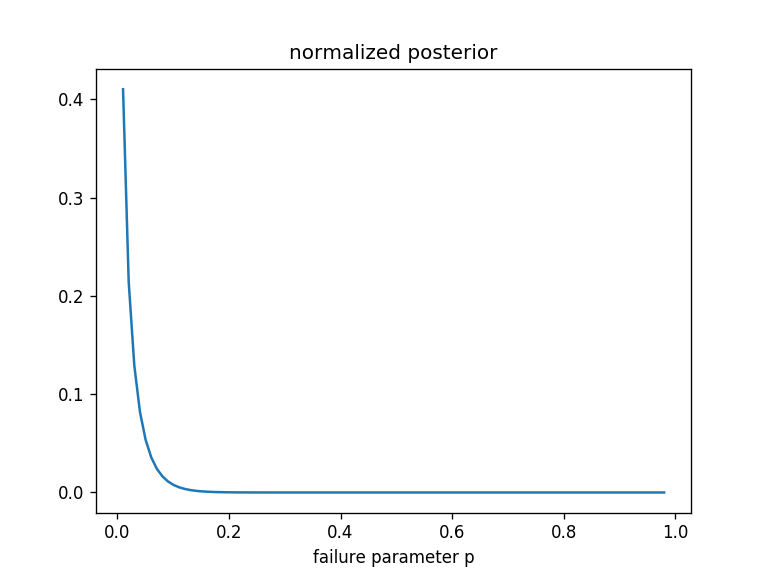

In [221]:
fig,ax = plt.subplots()
plt.plot(p_guesses,posterior/sum(posterior))
plt.xlabel('failure parameter p')
plt.title('normalized posterior')

<IPython.core.display.Javascript object>


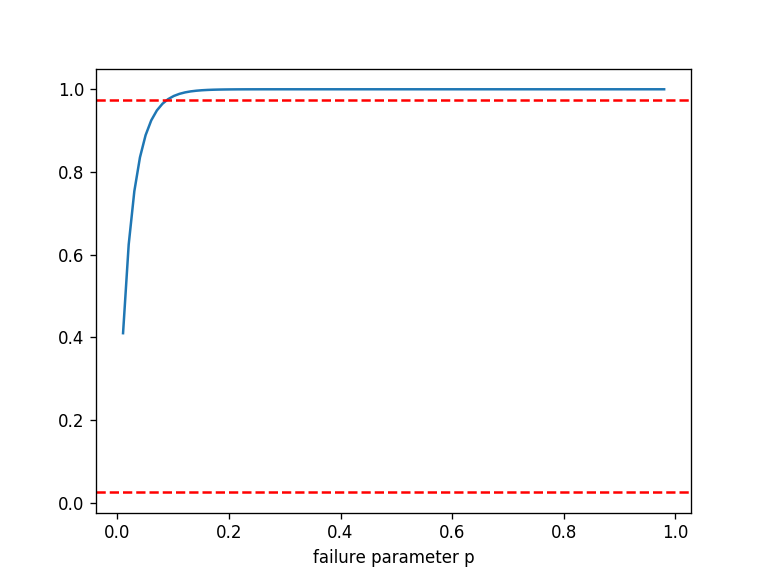

In [223]:
fig,ax = plt.subplots()
plt.plot(p_guesses,np.cumsum(posterior/sum(posterior)))
plt.xlabel('failure parameter p')
ax.axhline(y=(alpha/2),color='r',ls='dashed')
ax.axhline(y=(1-alpha/2),color='r',ls='dashed')

In [227]:
print integrate.trapz(posterior[0:9])/integrate.trapz(posterior)
print p_guesses[9]

0.963097103736
0.10101010101


<IPython.core.display.Javascript object>


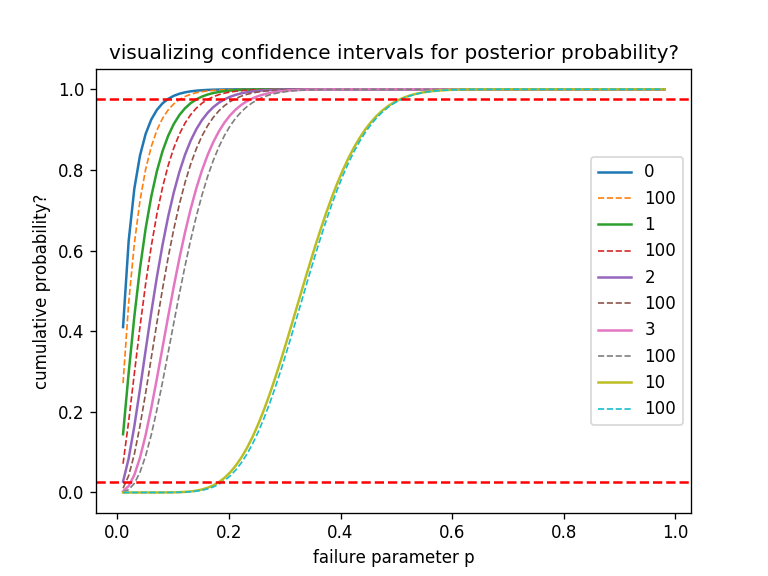

In [243]:
fig,ax = plt.subplots()

for fail_n in fail_rates:
    likelihood,p_guesses = get_binomial_likelihood(sample_n,fail_n)
    p_guesses = p_guesses[1:98]
    likelihood=likelihood[1:98]
    plt.plot(p_guesses,np.cumsum(likelihood*prior)/sum(likelihood*prior),label=str(fail_n))
    plt.plot(p_guesses,np.cumsum(likelihood)/sum(likelihood),label=str(size),ls='dashed',linewidth=1)

    plt.xlabel('failure parameter p')
    plt.ylabel('cumulative probability?')
    plt.legend(loc='best')
    plt.title('visualizing confidence intervals for posterior probability?')
ax.axhline(y=(alpha/2),color='r',ls='dashed')
ax.axhline(y=(1-alpha/2),color='r',ls='dashed')

<IPython.core.display.Javascript object>


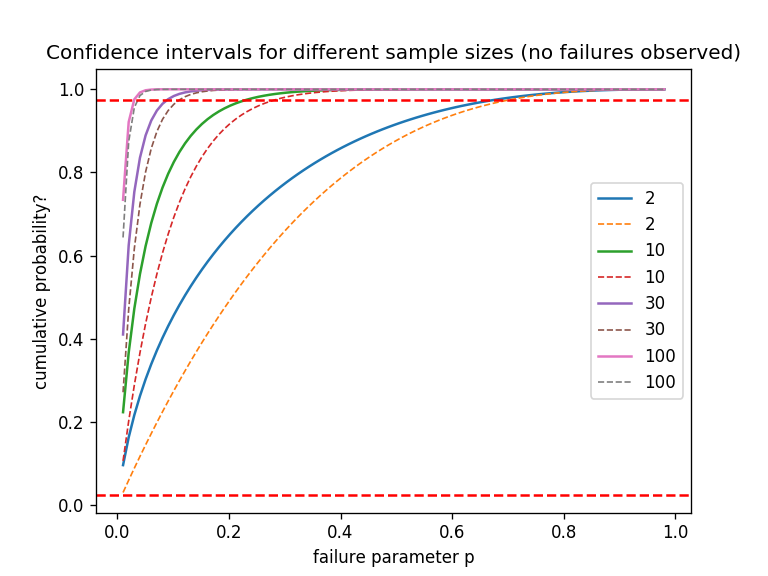

In [242]:
fig,ax = plt.subplots()

sample_sizes = [2,10, 30, 100]
for size in sample_sizes:
    likelihood,p_guesses = get_binomial_likelihood(size,failure_n)
    p_guesses = p_guesses[1:98]
    likelihood=likelihood[1:98]
    plt.plot(p_guesses,np.cumsum(likelihood*prior)/sum(likelihood*prior),label=str(size))
    plt.plot(p_guesses,np.cumsum(likelihood)/sum(likelihood),label=str(size),ls='dashed',linewidth=1)

    
    plt.xlabel('failure parameter p')
    plt.ylabel('cumulative probability?')
    plt.legend(loc='best')
    plt.title('Confidence intervals for different sample sizes (no failures observed)')
ax.axhline(y=(alpha/2),color='r',ls='dashed')
ax.axhline(y=(1-alpha/2),color='r',ls='dashed')